# Handwritten Digit Classifier using ANN

### Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


c:\Users\HP\miniconda3\envs\py310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


### Loading Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

### Normalizing Data
keeping the image array in range of (0,1) instead of (0,255)

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### Flattening images
as images are in form of 2D arrays but we need to pass it as parameters so flattening is neccessary

In [4]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

### Building an ANN Model

In [6]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

### Compiling Model

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training of Model

In [8]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 37s 14ms/step - loss: 0.2404 - accuracy: 0.9283 - val_loss: 0.1236 - val_accuracy: 0.9627
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1004 - accuracy: 0.9693 - val_loss: 0.1081 - val_accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0694 - accuracy: 0.9779 - val_loss: 0.0900 - val_accuracy: 0.9716
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0528 - accuracy: 0.9830 - val_loss: 0.0768 - val_accuracy: 0.9771
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0418 - accuracy: 0.9866 - val_loss: 0.0795 - val_accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0843 - val_accuracy: 0.9770
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0297 - accuracy: 0.9902 - val_loss: 0.0777 -

### Accuracy Report

In [9]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Get model predictions (probabilities)
y_pred_probs = model.predict(x_test)

# 2. Convert probabilities to class labels (0–9)
y_pred = np.argmax(y_pred_probs, axis=1)

# 3. Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# 4. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 5. Classification report (precision, recall, f1-score)
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

313/313 [==============================] - 4s 7ms/step
Test Accuracy: 0.9730
Confusion Matrix:
[[ 971    1    0    1    1    3    0    1    1    1]
 [   0 1127    1    1    0    0    2    0    4    0]
 [   4    0  990   26    0    0    1    5    5    1]
 [   0    0    1  998    0    3    0    5    0    3]
 [   3    1    0    1  950    2    8    5    1   11]
 [   3    0    0   14    1  870    1    1    2    0]
 [   3    2    0    1    4    6  940    0    2    0]
 [   1    3    4    5    0    1    0 1010    3    1]
 [   3    2    1   48    3    8    3    3  900    3]
 [   3    4    0    8    6    5    2    5    2  974]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.98      1032
           3       0.90      0.99      0.94      1010
           4       0.98      0.97      0.98       982
           5       0.97   

### Accuracy and Loss Curves

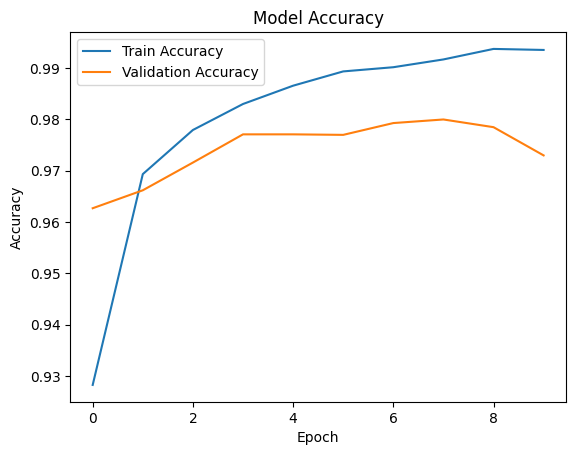

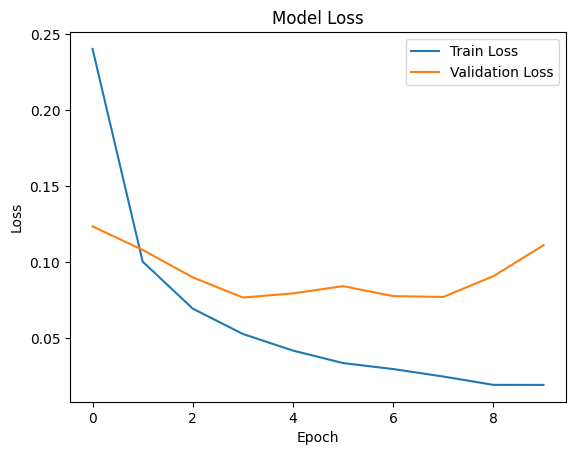

In [10]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()
